# Simple Autoregression Model

- An autoregression model is a linear regression model that uses lagged variables as input variables.
- [Autoregression Model for TSF](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)

# Imports + Load Data

In [1]:
import pandas as pd

from math import sqrt
from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.tsatools import add_lag

# test for stationarity
from statsmodels.tsa.stattools import adfuller

# partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
daily_min_temp_df = pd.read_csv('datasets/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
type(daily_min_temp_df), daily_min_temp_df

(pandas.core.frame.DataFrame,
             Temp
 Date            
 1981-01-01  20.7
 1981-01-02  17.9
 1981-01-03  18.8
 1981-01-04  14.6
 1981-01-05  15.8
 ...          ...
 1990-12-27  14.0
 1990-12-28  13.6
 1990-12-29  13.5
 1990-12-30  15.7
 1990-12-31  13.0
 
 [3650 rows x 1 columns])

<AxesSubplot: xlabel='Date'>

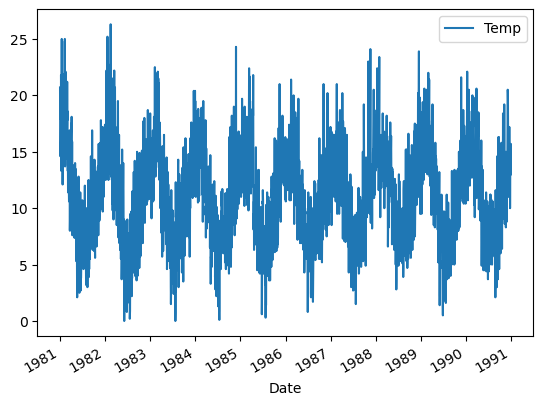

In [3]:
daily_min_temp_df.plot()

# Check Stationarity
1. We will look for p-value. Here, the p-value is less than 0.05, so stationarity exists. This means that our time series does NOT have any trends nor does it have seasonality.
2. With 1, does this validate that we can use an AR model? Or, what if there existed either a trend or seasonality, could we still use an AR model?


In [4]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(daily_min_temp_df, autolag='AIC')
adf, pvalue, usedlag, nobs, critical_values, icbest

(-4.4448049246117,
 0.0002470826300360994,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [5]:
round(pvalue, 5)

0.00025

# Plot ACor
- Why: To get which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.
- [ ] Why doesn't pandas plot start at 1.00 correlation? 

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

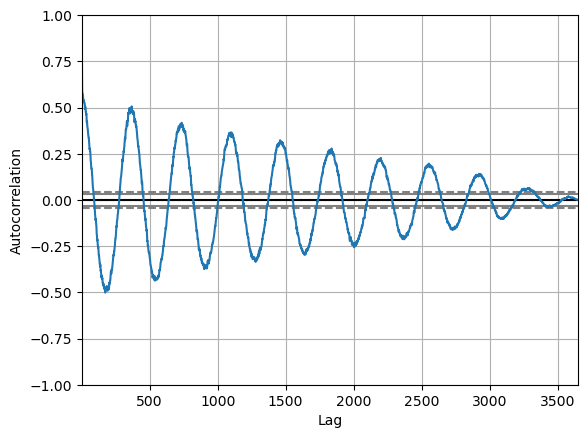

In [6]:
pd.plotting.autocorrelation_plot(daily_min_temp_df)

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


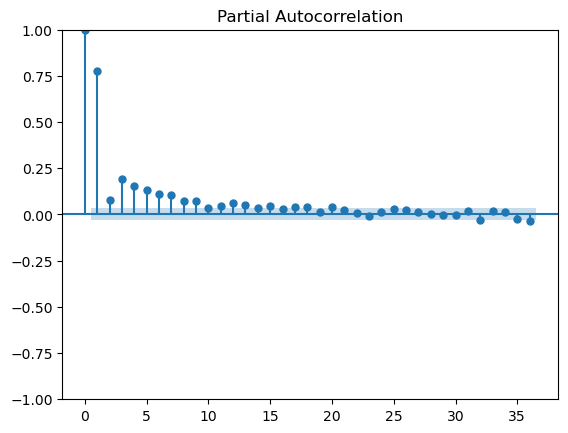

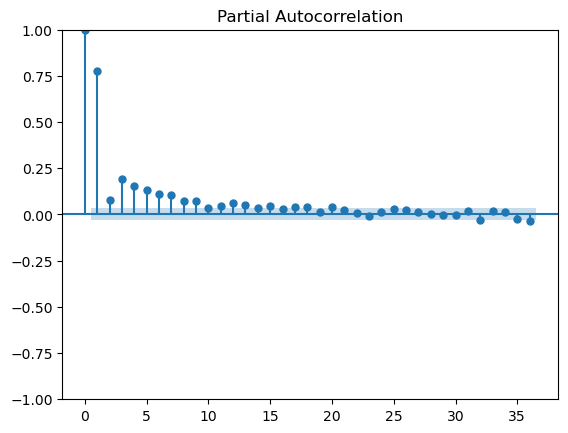

In [7]:
plot_pacf(daily_min_temp_df)

# Split Data

In [8]:
N = len(daily_min_temp_df)
N

3650

In [9]:
split_data_at_length = N - 7
split_data_at_length

3643

In [10]:
train_data = daily_min_temp_df[0:split_data_at_length]
train_data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-20,15.4
1990-12-21,13.1
1990-12-22,13.2


In [31]:
train_data = train_data.values
train_data

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.2],
       [13.9],
       [10. ]])

In [34]:
test_data = daily_min_temp_df[split_data_at_length:]
test_data

,Temp
Date,
1990-12-25,12.9
1990-12-26,14.6
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [35]:
test_data = test_data.values
test_data

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [36]:
# test = X[len(X) - 7 : ]
# len(test), test

In [37]:
# train_lag = add_lag(train)
# train_lag

# Create Model
1. Why set lags to 29?
2. How to understand the summary?

In [38]:
ar_model = AutoReg(train_data, lags=29)
ar_model

In [39]:
train_ar_model = ar_model.fit()
train_ar_model

In [40]:
print('Coefficients: %s' % train_ar_model.params)

Coefficients: [ 0.5597728   0.58866203 -0.09081226  0.04816399  0.03999111  0.03936764
  0.02594672  0.04467485  0.01314313  0.03714477 -0.00064057  0.00493921
  0.01802399  0.02696084  0.00062344  0.02445702  0.00735302  0.00992487
  0.03438475 -0.00909555  0.02416519  0.01856562  0.01229534 -0.01851848
 -0.00171714  0.01671254  0.019966    0.00963099  0.00636304 -0.0015663 ]


In [41]:
train_ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(29)   Log Likelihood               -8285.539
Method:               Conditional MLE   S.D. of innovations              2.396
Date:                Sat, 08 Jul 2023   AIC                          16633.078
Time:                        23:40:48   BIC                          16825.048
Sample:                            29   HQIC                         16701.478
                                 3643                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5598      0.149      3.766      0.000       0.268       0.851
y.L1           0.5887      0.017     35.375      0.000       0.556       0.621
y.L2          -0.0908      0.019     -4.703      0.000      -0.129      -0.053
y.L3           0.0482      0.019      2.487      0.013       0.010       0.086
y.L4           0.0400      0.019      2.063      0.039       0.002       0.078
y.L5           0.0394      0.019      2.030      0.042       0.001       0.077
y.L6           0.0259      0.019      1.337      0.181      -0.012       0.064
y.L7           0.0447      0.019      2.301      0.021       0.007       0.083
y.L8           0.0131      0.019      0.677      0.498      -0.025       0.051
y.L9           0.0371      0.019      1.914      0.056      -0.001       0.075
y.L10         -0.0006      0.019     -0.033      0.974      -0.039       0.037
y.L11          0.0049      0.019      0.255      0.799      -0.033       0.043
y.L12          0.0180      0.019      0.930      0.352      -0.020       0.056
y.L13          0.0270      0.019      1.391      0.164      -0.011       0.065
y.L14          0.0006      0.019      0.032      0.974      -0.037       0.039
y.L15          0.0245      0.019      1.263      0.207      -0.014       0.062
y.L16          0.0074      0.019      0.380      0.704      -0.031       0.045
y.L17          0.0099      0.019      0.512      0.608      -0.028       0.048
y.L18          0.0344      0.019      1.775      0.076      -0.004       0.072
y.L19         -0.0091      0.019     -0.469      0.639      -0.047       0.029
y.L20          0.0242      0.019      1.247      0.213      -0.014       0.062
y.L21          0.0186      0.019      0.958      0.338      -0.019       0.057
y.L22          0.0123      0.019      0.635      0.526      -0.026       0.050
y.L23         -0.0185      0.019     -0.956      0.339      -0.056       0.019
y.L24         -0.0017      0.019     -0.089      0.929      -0.040       0.036
y.L25          0.0167      0.019      0.864      0.388      -0.021       0.055
y.L26          0.0200      0.019      1.033      0.302      -0.018       0.058
y.L27          0.0096      0.019      0.499      0.618      -0.028       0.047
y.L28          0.0064      0.019      0.330      0.741      -0.031       0.044
y.L29         -0.0016      0.017     -0.094      0.925      -0.034       0.031
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0086           -0.0000j            1.0086           -0.0000
AR.2             1.0822           -0.2720j            1.1159           -0.0392
AR.3             1.0822           +0.2720j            1.1159            0.0392
AR.4             1.0239           -0.4949j            1.1372           -0.0717
AR

# Make Predictions
- [ ] Start making predictions at the split observation and go to the n-1 observation. A simplier example is with [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Say we split at 7. historical_data would start at 7. We will make predictions for 8, 9. What about 10?
- [ ] Why set `dynamic=False`

In [42]:
# train_data

In [43]:
historical_data = len(train_data)
historical_data

3643

In [44]:
tomorrow = len(daily_min_temp_df) - 1
tomorrow

3649

In [45]:
predictions = train_ar_model.predict(start=historical_data, end=tomorrow, dynamic=False)

In [47]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test_data[i]))

predicted=11.872160, expected=12.900000
predicted=13.055704, expected=14.600000
predicted=13.531810, expected=14.000000
predicted=13.242590, expected=13.600000
predicted=13.091564, expected=13.500000
predicted=13.146082, expected=15.700000
predicted=13.176492, expected=13.000000


In [49]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print(' Test RMSE: %.3f' % rmse)

 Test RMSE: 1.225


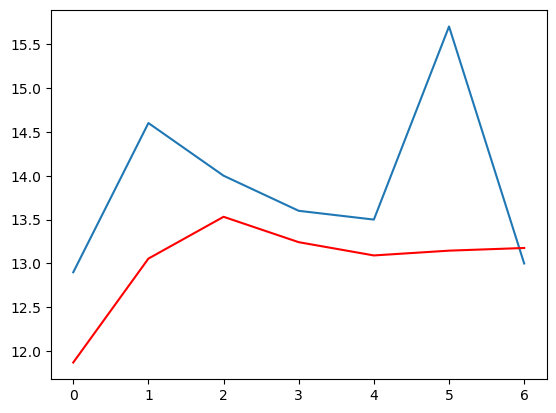

In [51]:
pyplot.plot(test_data)
pyplot.plot(predictions, color='red' )
pyplot.show()

## Create and Update AR Model

In [27]:
train = X[1 : len(X) - 7]
print(len(train)), (train)
test = X[len(X) - 7 : ]
print(len(test)), (test)
window = 29

3642
7


In [28]:
model = AutoReg(train, lags=29)

In [29]:
model_fit = model.fit()

In [30]:
coef = model_fit.params

In [31]:
coef

array([ 5.57543506e-01,  5.88595221e-01, -9.08257090e-02,  4.82615092e-02,
        4.00650265e-02,  3.93020055e-02,  2.59463738e-02,  4.46675960e-02,
        1.27681498e-02,  3.74362239e-02, -8.11700276e-04,  4.79081949e-03,
        1.84731397e-02,  2.68908418e-02,  5.75906178e-04,  2.48096415e-02,
        7.40316579e-03,  9.91622149e-03,  3.41599123e-02, -9.11961877e-03,
        2.42127561e-02,  1.87870751e-02,  1.21841870e-02, -1.85534575e-02,
       -1.77162867e-03,  1.67319894e-02,  1.97615668e-02,  9.83245087e-03,
        6.22710723e-03, -1.37732255e-03])

In [32]:
history = train[len(train) - window:]
history

array([[12.9],
       [ 8.8],
       [14.7],
       [14.7],
       [12.7],
       [13.3],
       [13.2],
       [16.2],
       [17.3],
       [20.5],
       [20.2],
       [19.4],
       [15.5],
       [14.1],
       [11. ],
       [11.1],
       [14. ],
       [11.4],
       [12.5],
       [13.4],
       [13.6],
       [13.9],
       [17.2],
       [14.7],
       [15.4],
       [13.1],
       [13.2],
       [13.9],
       [10. ]])

In [33]:
history = [history[i] for i in range(len(history))]
history

[array([12.9]),
 array([8.8]),
 array([14.7]),
 array([14.7]),
 array([12.7]),
 array([13.3]),
 array([13.2]),
 array([16.2]),
 array([17.3]),
 array([20.5]),
 array([20.2]),
 array([19.4]),
 array([15.5]),
 array([14.1]),
 array([11.]),
 array([11.1]),
 array([14.]),
 array([11.4]),
 array([12.5]),
 array([13.4]),
 array([13.6]),
 array([13.9]),
 array([17.2]),
 array([14.7]),
 array([15.4]),
 array([13.1]),
 array([13.2]),
 array([13.9]),
 array([10.])]

In [34]:
predictions = list()

In [35]:
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))

predicted=6.443496, expected=12.900000
predicted=5.181018, expected=12.900000
predicted=5.818070, expected=12.900000
predicted=6.342922, expected=12.900000
predicted=6.948173, expected=12.900000
predicted=7.329585, expected=12.900000
predicted=8.097867, expected=12.900000
predicted=8.275345, expected=12.900000
predicted=8.784477, expected=12.900000
predicted=8.773601, expected=12.900000
predicted=8.833486, expected=12.900000
predicted=9.044080, expected=12.900000
predicted=9.420551, expected=12.900000
predicted=9.426944, expected=12.900000
predicted=9.699850, expected=12.900000
predicted=9.804235, expected=12.900000
predicted=9.957936, expected=12.900000
predicted=10.620638, expected=12.900000
predicted=10.436422, expected=12.900000
predicted=10.932784, expected=12.900000
predicted=11.257800, expected=12.900000
predicted=11.455184, expected=12.900000
predicted=11.210278, expected=12.900000
predicted=11.186715, expected=12.900000
predicted=11.399212, expected=12.900000
predicted=11.6897

In [39]:
rmse = sqrt(mean_squared_error(test, predictions[: len(test)]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.224


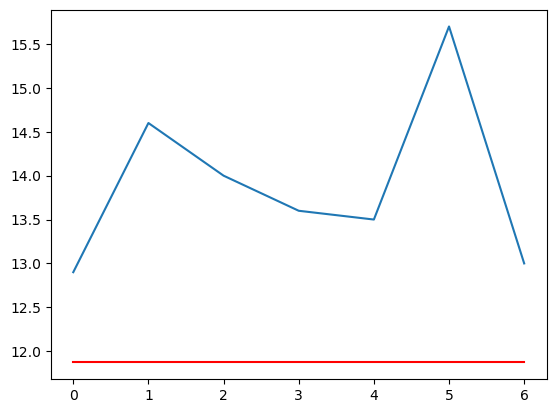

In [40]:
pyplot.plot(test)
pyplot.plot(predictions[: len(test)], color='red')
pyplot.show()